In [30]:
from util import *
from rbm import RestrictedBoltzmannMachine 
from dbn import DeepBeliefNet
%load_ext autoreload
%autoreload 2

In [2]:
image_size = [28,28]
train_imgs,train_lbls,test_imgs,test_lbls = read_mnist(dim=image_size, n_train=60000, n_test=10000)

''' restricted boltzmann machine '''
    
print ("\nStarting a Restricted Boltzmann Machine..")

rbm = RestrictedBoltzmannMachine(ndim_visible=image_size[0]*image_size[1],
                                     ndim_hidden=500,
                                     is_bottom=True,
                                     image_size=image_size,
                                     is_top=False,
                                     n_labels=10,
                                     batch_size=20
    )
    
rbm.cd1(visible_trainset=train_imgs, n_iterations=10)




Starting a Restricted Boltzmann Machine..
learning CD1
60000
iteration=      0 recon_loss=0.0877
iteration=      1 recon_loss=0.0740
iteration=      2 recon_loss=0.0673
iteration=      3 recon_loss=0.0626
iteration=      4 recon_loss=0.0604
iteration=      5 recon_loss=0.0580
iteration=      6 recon_loss=0.0566
iteration=      7 recon_loss=0.0552
iteration=      8 recon_loss=0.0534
iteration=      9 recon_loss=0.0543


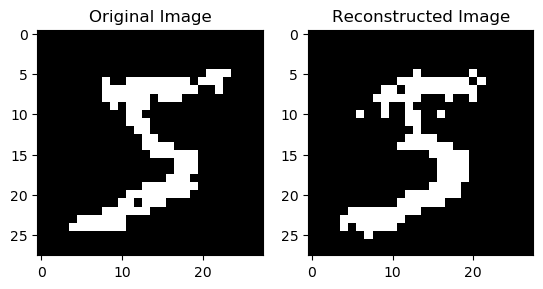

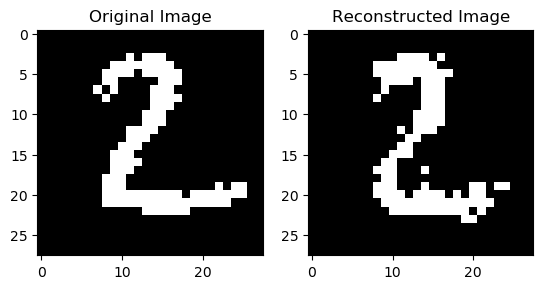

In [24]:
#examining the reconstruction of the visible layer

test=train_imgs[0]
v_0 = sample_binary(test)
p_h_0, h_0 = rbm.get_h_given_v(v_0)
p_v_1, v_1 = rbm.get_v_given_h(h_0)
p_h_1, h_1 = rbm.get_h_given_v(v_1)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(v_0.reshape(image_size), cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(v_1.reshape(image_size), cmap='gray')
ax[1].set_title('Reconstructed Image')
plt.show()

test2=test_imgs[1]
v_0 = sample_binary(test2)
p_h_0, h_0 = rbm.get_h_given_v(v_0)
p_v_1, v_1 = rbm.get_v_given_h(h_0)
p_h_1, h_1 = rbm.get_h_given_v(v_1)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(v_0.reshape(image_size), cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(v_1.reshape(image_size), cmap='gray')
ax[1].set_title('Reconstructed Image')
plt.show()


In [27]:
error_mse = np.mean(np.square(v_0 - v_1))
error = np.mean(np.abs(v_0 - v_1))
print(error)
print((error_mse))



0.06505102040816327
0.06505102040816327


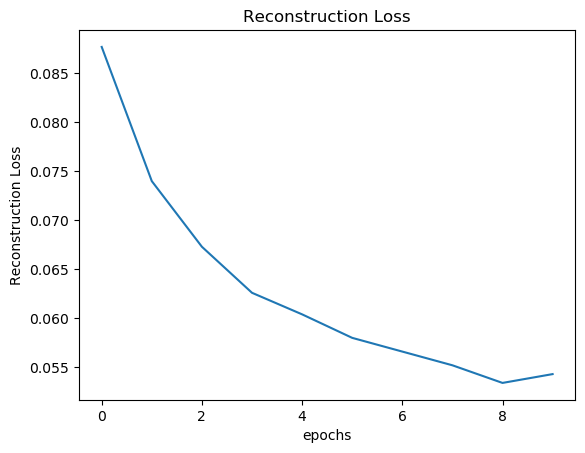

In [4]:
import matplotlib.pyplot as plt

recon_loss=[]
recon_loss.append(0.0877)
recon_loss.append(0.0740)
recon_loss.append(0.0673)
recon_loss.append(0.0626)
recon_loss.append(0.0604)
recon_loss.append(0.0580)
recon_loss.append(0.0566)
recon_loss.append(0.0552)
recon_loss.append(0.0534)
recon_loss.append(0.0543)

plt.plot(recon_loss)
plt.xlabel('epochs')
plt.ylabel('Reconstruction Loss')
plt.title('Reconstruction Loss')
plt.savefig('recon_loss.png')
plt.show()
